In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [3]:
df = pd.read_csv("Advertising.csv")

In [4]:
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

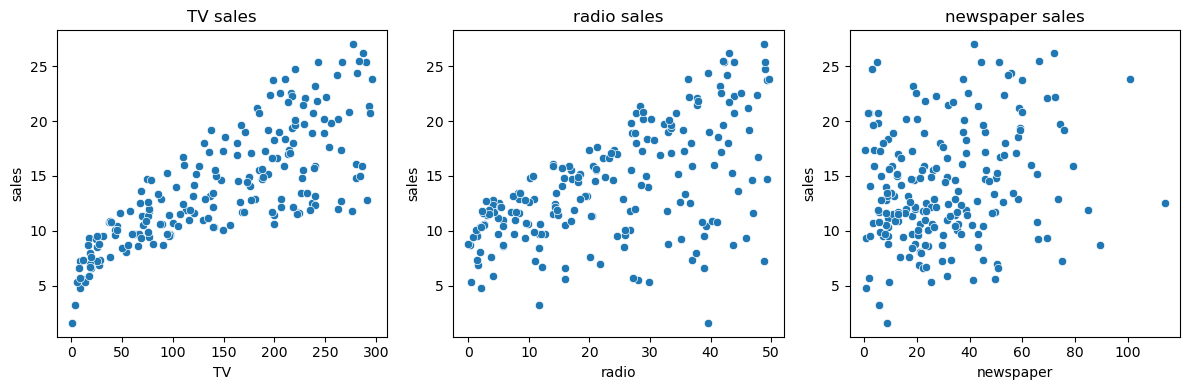

In [10]:
fig, axes = plt.subplots(ncols=3,figsize=(12,4))

for i in range(len(axes)):
    sns.scatterplot(data=df,x=df[df.columns[i]],y='sales',ax=axes[i])
    axes[i].set_title(f"{df.columns[i]} sales")
    
plt.tight_layout()

In [11]:
df.corr()

TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000

<Axes: >

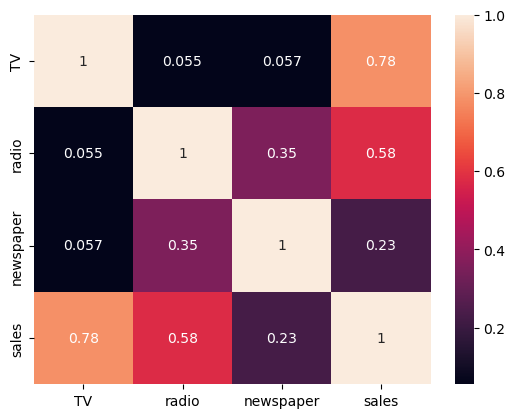

In [14]:
sns.heatmap(df.corr(),annot=True)

In [16]:
X = df.drop("sales",axis=1)
y = df['sales']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [29]:
X_train.shape

(140, 3)

In [30]:
X_test.shape

(60, 3)

In [31]:
model = LinearRegression()

In [32]:
model.fit(X_train,y_train)

LinearRegression()

In [33]:
test_predictions = model.predict(X_test)

In [34]:
mean_absolute_error(y_test,test_predictions)

1.2137457736144803

In [35]:
mean_squared_error(y_test,test_predictions)

2.2987166978863782

In [36]:
rmse = np.sqrt(mean_squared_error(y_test,test_predictions))
rmse

1.516151937599388

In [37]:
test_res = y_test - test_predictions

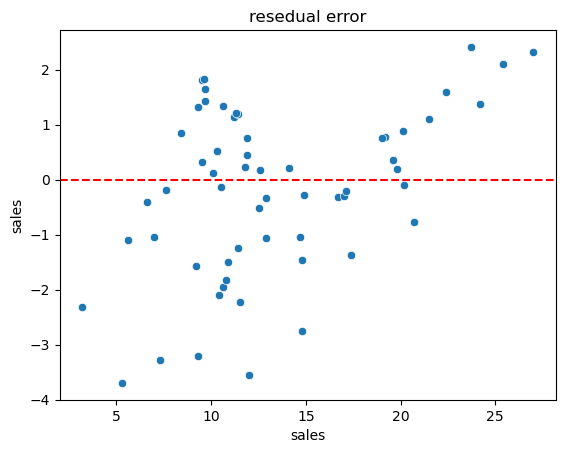

In [44]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("resedual error")
plt.show()

In [39]:
final_model = model.fit(X,y)

In [40]:
y_hat = final_model.predict(X)

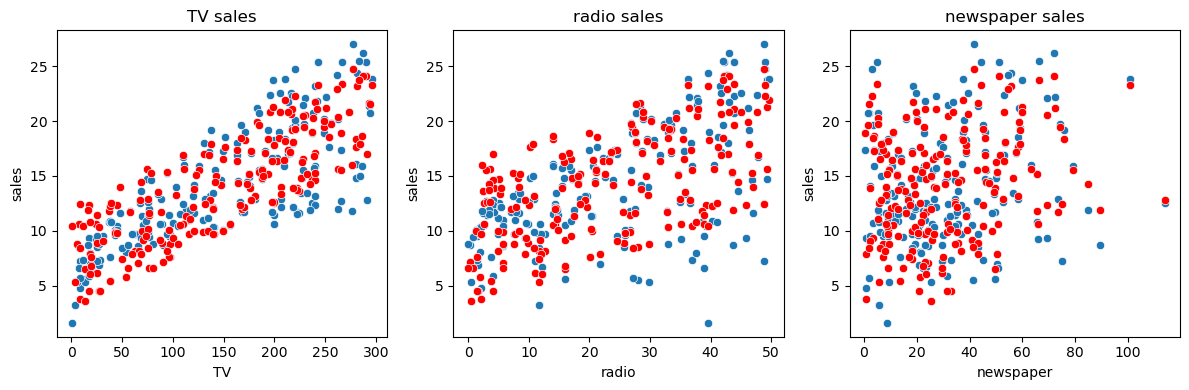

In [42]:
fig, axes = plt.subplots(ncols=3,figsize=(12,4))

for i in range(len(axes)):
    sns.scatterplot(data=df,x=df[df.columns[i]],y='sales',ax=axes[i])
    sns.scatterplot(data=df,x=df[df.columns[i]],y=y_hat,ax=axes[i],color='red')
    axes[i].set_title(f"{df.columns[i]} sales")
    
plt.tight_layout()

In [47]:
from joblib import dump, load

In [46]:
dump(final_model,'sales_model.joblib')

['sales_model.joblib']

In [48]:
loaded_model = load('sales_model.joblib')

In [49]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [50]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])